In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

## In order to get updated information from websit I set the index on actual date + 3 because of pulled proper 'ul' values

now = pd.to_datetime(str(date.today()), format='%Y-%m-%d')
index_nr = now.day + 3

URL = 'https://en.wikipedia.org/wiki/Deaths_in_2020'
web =  requests.get(URL)
uls = BeautifulSoup(web.text,'lxml')


div = uls.find('div', class_='mw-parser-output')
h3 = div.find_all('h3')
ul = uls.find_all('ul')

days_april = []
data_april = []

for b in h3[1:]:
    result = b.text.strip()
    days_april.append(result)

    
for a in ul[3:index_nr]:
    result2 = a.text.strip()
    data_april.append(result2)
    
df_april = pd.DataFrame({'Dzień': days_april,'Data': data_april})

df_april.head(10)


,Dzień,Data
0,23,"Arief Budiman, 79, Indonesian political activi..."
1,22,"Sir Eric Anderson, 83, British educator, Headm..."
2,21,"Richard Akinjide, 89, Nigerian jurist, Ministe..."
3,20,"Heherson Alvarez, 80, Filipino politician, Sen..."
4,19,"Marat Aleksanian, 70, Armenian politician, Min..."
5,18,"Erik Belfrage, 74, Swedish diplomat and bankin..."
6,17,"Bennie G. Adkins, 86, American army Green Bere..."
7,16,"Joseph Adler, 79, American theatre and film di..."
8,15,"Adam Alsing, 51, Swedish television and radio ..."
9,14,"Tommy Astone, 70, American Hall of Fame racing..."


In [2]:
## Classification of cause of death

typ_of_disease = [' cancer','pneumonia','kidney','cardiac arrest','traffic','COVID-19','aneurysm','suicide','shot','heart','brain','crash','lung infection','traffic collision','bladder cancer','heart attack','heart failure','lymphoma','cardiac arrest','respiratory','diabetes','pulmonary edema','prostate','liver disease','pelvic cancer','cerebral hemorrhage','multiple myeloma','skin','multiple organ failure']


In [3]:
df_april.Data.str.split(pat='\n').tolist()[0]

['Arief Budiman, 79, Indonesian political activist and sociologist.[1]',
 'Usha Ganguly, 75, Indian theatre director and actress, founder of Rangakarmee, cardiac arrest.[2]',
 'Kumiko Okae\xa0[ja], 63, Japanese actress and television presenter, COVID-19.[3]']

In [4]:
## Comments

April = pd.DataFrame(df_april.Data.str.split(pat='\n').tolist(), index=df_april['Dzień']).stack()

## Comments

April = April.reset_index([0, 'Dzień'])

## Comments

April.columns = ['Day','Wiki_data']

## Comments

April['Name'] = April.Wiki_data.str.split(',', expand = True)[0]


## Comments

April['Year'] =  April.Wiki_data.str.split(',', expand = True)[1]

## Comments

April['Occupation'] = April.Wiki_data.str.split(',', expand = True)[2]


# Cause of death are in index from 3 to 7 (Wiki_data). We have to check all of these index if C.O.D is equal "Covid-19" 

April['C.O.D - Covid-19'] = April.Wiki_data.str.contains("COVID-19", na= False)


## Pulling out the information about cause of death if known 
 
April['C.O.D'] = April.Wiki_data.str.findall('|'.join(typ_of_disease)).apply(set).str.join(', ')
April['C.O.D'].replace('', 'Missing Information', inplace=True)

## Add new column with Month

April.insert(2, "Month", 'April', True)

## Add new column with Nationality

Nationality = April['Occupation'].str.split(n=1,expand=True)[0]

April['Nationality'] = Nationality

## 

April['Occupation'] = April['Occupation'].str.split(n=1, expand=True)[1]
April['Occupation'] = April['Occupation'].str.replace('\d', '').str.strip('[]')



##
Important_columns = ['Day','Month','Name','Nationality','Year','Occupation','C.O.D']



April_end = April[Important_columns]

April_end.head(50)


,Day,Month,Name,Nationality,Year,Occupation,C.O.D
0,23,April,Arief Budiman,Indonesian,79,political activist and sociologist.,Missing Information
1,23,April,Usha Ganguly,Indian,75,theatre director and actress,cardiac arrest
2,23,April,Kumiko Okae [ja],Japanese,63,actress and television presenter,COVID-19
3,22,April,Sir Eric Anderson,British,83,educator,Missing Information
4,22,April,El Príncipe Gitano,Spanish,88,flamenco singer and actor,COVID-19
5,22,April,Hartwig Gauder,German,65,race walker,Missing Information
6,22,April,Jimmy Goodfellow,English,76,football player (Workington,Missing Information
7,22,April,Saadat Husain,Bangladeshi,73,civil servant,kidney
8,22,April,Shirley Knight,American,83,actress (The Dark at the Top of the Stairs,Missing Information
9,22,April,Marcos Mundstock,Argentine,77,musician,brain


In [5]:
April['C.O.D - Covid-19'].value_counts()

False    502
True     189
Name: C.O.D - Covid-19, dtype: int64

## MARCH

In [6]:



URL = 'https://en.wikipedia.org/wiki/Deaths_in_March_2020'
web =  requests.get(URL)
uls = BeautifulSoup(web.text,'lxml')


div = uls.find('div', class_='mw-parser-output')
h3 = div.find_all('h3')
ul = uls.find_all('ul')

days_march = []
data_march = []

for b in h3[:]:
    result = b.text.strip()
    days_march.append(result)

    
for a in ul[2:33]:
    result2 = a.text.strip()
    data_march.append(result2)
    
df_march = pd.DataFrame({'Dzień': days_march,'Data': data_march})

March = pd.DataFrame(df_march.Data.str.split(pat='\n').tolist(), index=df_march['Dzień']).stack()

March = March.reset_index([0, 'Dzień'])

March.columns = ['Day','Wiki_data']

March['Name'] = March.Wiki_data.str.split(',', expand = True)[0]

March['Year'] = March.Wiki_data.str.split(',', expand = True)[1]

March['Occupation'] = March.Wiki_data.str.split(',', expand = True)[2]
 
March['C.O.D - Covid-19'] = March.Wiki_data.str.contains("COVID-19", na= False)

## Remove redundant strings 

March['Day'] = March['Day'].str.replace('\D', '')

## Add new column with name of month

March.insert(2, "Month", 'March', True)

## Add new column with Nationality

Nationality = March['Occupation'].str.split(n=1,expand=True)[0]

March['Nationality'] = Nationality

March['Occupation'] = March['Occupation'].str.split(n=1, expand=True)[1]
March['Occupation'] = March['Occupation'].str.replace('\d', '').str.strip('[]')

March_end = March

## Classification of cause of death

typ_of_disease = [' cancer','pneumonia','kidney','cardiac arrest','traffic','COVID-19','aneurysm','suicide','shot','heart','brain','crash','lung infection','traffic collision','bladder cancer','heart attack','heart failure','lymphoma','cardiac arrest','respiratory','diabetes','pulmonary edema','prostate','liver disease','pelvic cancer','cerebral hemorrhage','multiple myeloma','skin','multiple organ failure']

March_end['C.O.D'] = March.Wiki_data.str.findall('|'.join(typ_of_disease)).apply(set).str.join(', ')
March_end['C.O.D'].replace('', 'Missing Information', inplace=True)

##

Important_columns = ['Day','Month','Name','Nationality','Year','Occupation','C.O.D']

March_end1 = March_end[Important_columns]

March_end1.head()



,Day,Month,Name,Nationality,Year,Occupation,C.O.D
0,1,March,István Balsai,Hungarian,72,jurist and politician,Missing Information
1,1,March,Clara D. Bloomfield,American,77,physician and cancer researcher.,cancer
2,1,March,Carsten Bresch,German,98,physicist and geneticist.,Missing Information
3,1,March,Laura Caldwell,American,52,novelist and lawyer,cancer
4,1,March,Ernesto Cardenal,Nicaraguan,95,Roman Catholic priest and poet (The Gospel in ...,Missing Information


## February 

In [7]:
URL = 'https://en.wikipedia.org/wiki/Deaths_in_February_2020'
web =  requests.get(URL)
uls = BeautifulSoup(web.text,'lxml')


div = uls.find('div', class_='mw-parser-output')
h3 = div.find_all('h3')
ul = uls.find_all('ul')

days_feb = []
data_feb = []

for b in h3[:]:
    result = b.text.strip()
    days_feb.append(result)

    
for a in ul[2:31]:
    result2 = a.text.strip()
    data_feb.append(result2)
    
df_feb = pd.DataFrame({'Dzień': days_feb,'Data': data_feb})

Feb = pd.DataFrame(df_feb.Data.str.split(pat='\n').tolist(), index=df_feb['Dzień']).stack()

Feb = Feb.reset_index([0, 'Dzień'])

Feb.columns = ['Day','Wiki_data']

Feb['Name'] = Feb.Wiki_data.str.split(',', expand = True)[0]

Feb['Year'] = Feb.Wiki_data.str.split(',', expand = True)[1]

Feb['Occupation'] = Feb.Wiki_data.str.split(',', expand = True)[2]
 
Feb['C.O.D - Covid-19'] = Feb.Wiki_data.str.contains("COVID-19", na= False)

## Remove redundant strings 

Feb['Day'] = Feb['Day'].str.replace('\D', '')

## Add new column with name of month

Feb.insert(2, "Month", 'February', True)

## Add new column with Nationality

Nationality_feb = Feb['Occupation'].str.split(n=1,expand=True)[0]

Feb['Nationality'] = Nationality

Feb['C.O.D'] = Feb.Wiki_data.str.findall('|'.join(typ_of_disease)).apply(set).str.join(', ')
Feb['C.O.D'].replace('', 'Missing Information', inplace=True)

Feb['Occupation'] = Feb['Occupation'].str.split(n=1, expand=True)[1]
Feb['Occupation'] = Feb['Occupation'].str.replace('\d', '').str.strip('[]')


#Important_columns = ['Day','Month','Name','Nationality','Year','C.O.D']

Feb_end = Feb[Important_columns] 

Feb_end.head()


,Day,Month,Name,Nationality,Year,Occupation,C.O.D
0,1,February,Viktor Afanasyev,Hungarian,72,military musician,Missing Information
1,1,February,Péter Andorai,American,71,actor (My Father's Happy Years,Missing Information
2,1,February,Danny Ayres,German,33,speedway rider.,Missing Information
3,1,February,Ilie Bărbulescu,American,62,footballer (Argeș Pitești,heart
4,1,February,Leons Briedis,Nicaraguan,70,poet and author.,Missing Information


## JANUARY 

In [8]:
URL = 'https://en.wikipedia.org/wiki/Deaths_in_January_2020'
web =  requests.get(URL)
uls = BeautifulSoup(web.text,'lxml')


div = uls.find('div', class_='mw-parser-output')
h3 = div.find_all('h3')
ul = uls.find_all('ul')

days_jan = []
data_jan = []

for b in h3[:]:
    result = b.text.strip()
    days_jan.append(result)

    
for a in ul[2:33]:
    result2 = a.text.strip()
    data_jan.append(result2)
    
df_jan = pd.DataFrame({'Dzień': days_jan,'Data': data_jan})

Jan = pd.DataFrame(df_jan.Data.str.split(pat='\n').tolist(), index=df_jan['Dzień']).stack()

Jan = Jan.reset_index([0, 'Dzień'])

Jan.columns = ['Day','Wiki_data'] 

Jan['Name'] = Jan.Wiki_data.str.split(',', expand = True)[0]

Jan['Year'] = Jan.Wiki_data.str.split(',', expand = True)[1]

Jan['Occupation'] = Jan.Wiki_data.str.split(',', expand = True)[2]
 
Jan['C.O.D - Covid-19'] = Jan.Wiki_data.str.contains("COVID-19", na= False)

## Remove redundant strings 

Jan['Day'] = Jan['Day'].str.replace('\D', '')

## Add new column with name of month

Jan.insert(2, "Month", 'January', True)

## Add new column with Nationality

Nationality_jan = Jan['Occupation'].str.split(n=1,expand=True)[0]

Jan['Nationality'] = Nationality

Jan['C.O.D'] = Jan.Wiki_data.str.findall('|'.join(typ_of_disease)).apply(set).str.join(', ')
Jan['C.O.D'].replace('', 'Missing Information', inplace=True)

Jan['Occupation'] = Jan['Occupation'].str.split(n=1, expand=True)[1]
Jan['Occupation'] = Jan['Occupation'].str.replace('\d', '').str.strip('[]')


Jan_end = Jan[Important_columns] 

Jan_end.head()



,Day,Month,Name,Nationality,Year,Occupation,C.O.D
0,1,January,János Aczél,Hungarian,95,mathematician.,Missing Information
1,1,January,Lexii Alijai,American,21,rapper,Missing Information
2,1,January,Chris Barker,German,39,footballer (Barnsley,Missing Information
3,1,January,Joan Benson,American,94,keyboard player.,Missing Information
4,1,January,Aleksandr Aleksandrovich Blagonravov,Nicaraguan,86,scientist.,Missing Information


## Concate a whole of data 

In [9]:
April_end
March_end1
Feb_end
Jan_end

Deaths_2020 = pd.concat([April_end,March_end1,Feb_end,Jan_end])

## Convert value from string to float and get rid of the non-numeric values 

Deaths_2020.Year = (pd
.to_numeric(Deaths_2020['Year'],errors='coerce')
.astype('Int32')
.fillna(0, downcast='infer')
                   )


## Clearing the data with Nationality

Deaths_2020.Nationality = Deaths_2020.Nationality.str.extract(r'(^[A-Z][a-z][a-z][a-z]+)', expand=False)

## remove parentheses and all data within

Deaths_2020['Occupation'] = Deaths_2020['Occupation'].str.replace(r"\(.*\)","")


Deaths_2020

,Day,Month,Name,Nationality,Year,Occupation,C.O.D
0,23,April,Arief Budiman,Indonesian,79,political activist and sociologist.,Missing Information
1,23,April,Usha Ganguly,Indian,75,theatre director and actress,cardiac arrest
2,23,April,Kumiko Okae [ja],Japanese,63,actress and television presenter,COVID-19
3,22,April,Sir Eric Anderson,British,83,educator,Missing Information
4,22,April,El Príncipe Gitano,Spanish,88,flamenco singer and actor,COVID-19
...,...,...,...,...,...,...,...
673,31,January,Dale L. Mortensen,Austrian,53,politician,Missing Information
674,31,January,Keith Nelson,Italian,77,New Zealand footballer .,Missing Information
675,31,January,Frank Press,Spanish,95,geophysicist,Missing Information
676,31,January,Ajmal Sultanpuri,American,95,Urdu poet.,Missing Information


## Data Analysis 

## Distribution of death by cause

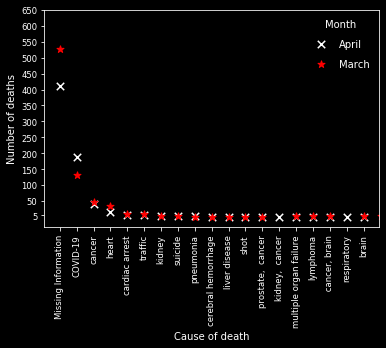

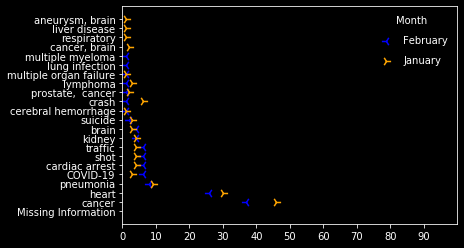

In [10]:
## Remove complexity of C.O.D 
from matplotlib.pyplot import figure


Rem_com = Deaths_2020

Rem_com['C.O.D'].replace(['heart, COVID-19','COVID-19, heart'],'COVID-19',inplace=True)
Rem_com['C.O.D'].replace(['suicide, shot','shot, suicide'],'suicide',inplace=True)
Rem_com['C.O.D'].replace([' cancer, skin',' cancer, prostate','bladder cancer','brain,  cancer','skin,  cancer',' cancer','skin','pelvic cancer'],'cancer',inplace = True)

Rem_com.Nationality.dropna(inplace=True)

april = Rem_com[Rem_com.Month == 'April']
april_cod = april['C.O.D'].value_counts()
march = Rem_com[Rem_com.Month == 'March']
march_cod = march['C.O.D'].value_counts()
feb = Rem_com[Rem_com.Month == 'February']
feb_cod = feb['C.O.D'].value_counts()
jan = Rem_com[Rem_com.Month == 'January']
jan_cod = jan['C.O.D'].value_counts()

y = april_cod.reset_index()['C.O.D']
x = april_cod.reset_index()['index']
y1 = march_cod.reset_index()['C.O.D']
x1 = march_cod.reset_index()['index']
x2 = feb_cod.reset_index()['C.O.D']
y2 = feb_cod.reset_index()['index']
x3 = jan_cod.reset_index()['C.O.D']
y3 = jan_cod.reset_index()['index']

plt.style.use('dark_background')
plt.scatter(x,y,label='April',marker= 'x', s= 55,color='white')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Month')
plt.tick_params(labelsize=8.5)
plt.gca().set_xlim()
plt.xticks(rotation='vertical')
plt.xlabel('Cause of death')
plt.ylabel('Number of deaths')
plt.scatter(x1,y1,label='March',marker= '*', s= 55,color='red')

tick1 = np.arange(5,15, 10)

tick2 = np.arange(50, 700, 50)
yticks = np.concatenate((tick1, tick2))
plt.yticks(yticks)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Month')

plt.show()

plt.scatter(x2,y2,label='February',marker= '3', s= 85,color='blue')
plt.scatter(x3,y3,label='January',marker= '4', s= 85,color='orange')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Month')
plt.xticks(np.arange(0,100, 10))
plt.xlim(0,100)
plt.show()

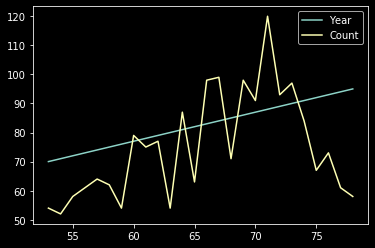

In [15]:

Year = Deaths_2020.Year.replace(0,np.nan,inplace=True)
Year = Deaths_2020.groupby(['Year']).size().rename('Count').reset_index()
Year[Year.Count > 50].plot()


In [26]:


#Nationality[Nationality.Count >40].sort_values('Count',ascending=False)

#test = pd.DataFrame()

#for name, group in Rem_com.reset_index().groupby('Nationality'):
    #if test.empty:
        #test = group.set_index('Month')[['Day']].rename(columns={'Day':name})
    #else:
       # test = test.join(group.set_index('Month')[['Day']].rename(columns={'Day':name}))

  

In [29]:
Nationality = Rem_com.reset_index().groupby('Nationality')['Nationality'].count().rename('Count').reset_index()

Natonality = Nationality[Nationality.Count > 50]
Natonality


,Nationality,Count
1,American,737
4,Australian,56
17,British,117
21,Canadian,84
33,Dutch,61
36,English,81
42,French,201
45,German,83
54,Indian,90
56,Iranian,53


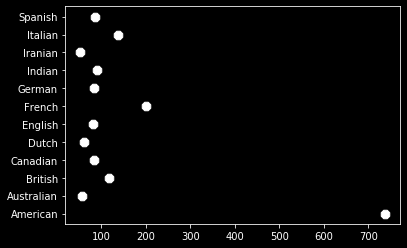

In [34]:
plt.scatter(Natonality.Count,Natonality.Nationality,label='February',marker= '8', s= 85,color='white')

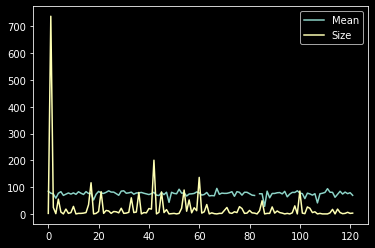

In [74]:


 
Nationality1 = (
    Rem_com.reset_index()
    .groupby('Nationality')[['Year','C.O.D']]
    .agg([np.mean,np.size])
    .reset_index()
)
Nationality1.columns = ['Nationality','Mean','Size']
Nationality1.plot()

#plt.plot(Nationality1.Mean,Nationality1.Size)

In [76]:
Nationality1.corr()

,Mean,Size
Mean,1.000000,0.075009
Size,0.075009,1.000000
